In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir("./data"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv('./data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Testing data features
app_test = pd.read_csv('./data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

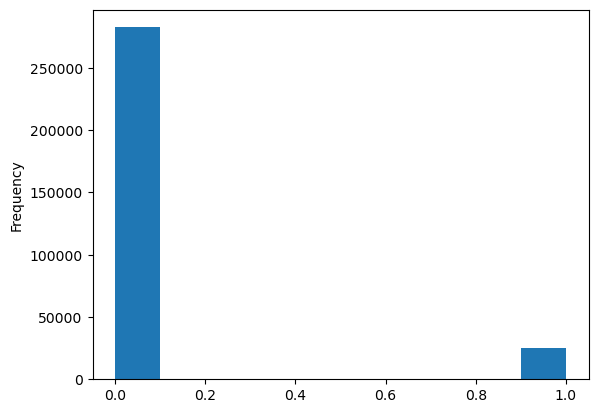

In [6]:
app_train['TARGET'].astype(int).plot.hist();

<Axes: ylabel='Frequency'>

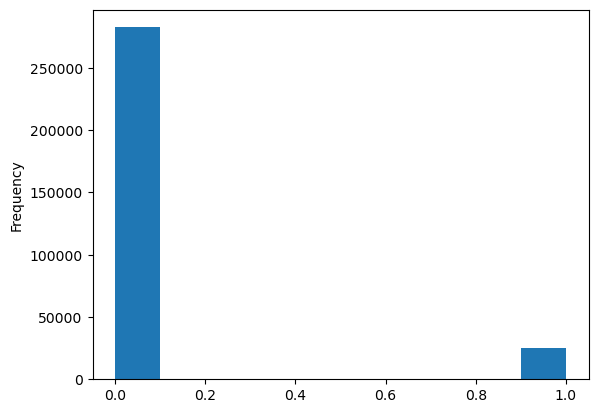

In [7]:
app_train['TARGET'].astype(int).plot.hist()

In [8]:
# Examine Missing Values

In [9]:
def handle_missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=(mis_val/len(df))*100
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(
        columns={0:'Missing Values',1:'% of Total Values'}
    )
    mis_val_table_ren_columns=mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
            '% of Total Values',ascending=False
        ).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
    

In [10]:
# Missing values statistics
missing_values = handle_missing_values(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [11]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [12]:
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [13]:
le = LabelEncoder()
le_count = 0
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(app_train[col].unique())<=2:
            le.fit(app_train[col])
            app_train[col]=le.transform(app_train[col])
            app_test[col]=le.transform(app_test[col])
            le_count+=1
print("%d columns were label encoded."%le_count)

3 columns were label encoded.


In [14]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [15]:
train_labels = app_train['TARGET']
app_train,app_test = app_train.align(app_test,join='inner',axis=1)
app_train['TARGET']=train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [16]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [17]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'days employment')

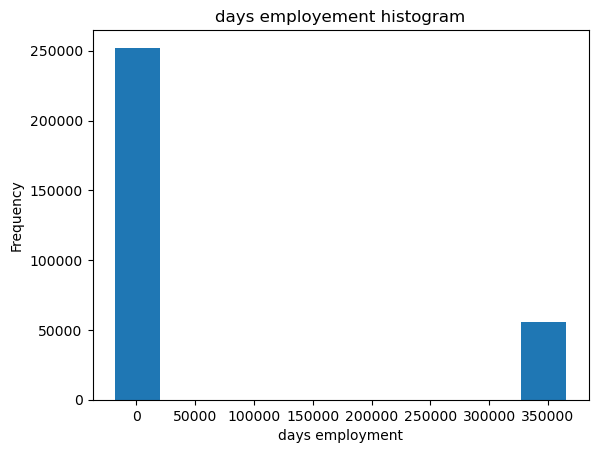

In [18]:
app_train['DAYS_EMPLOYED'].plot.hist(title ='days employement histogram')
plt.xlabel('days employment')

In [19]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


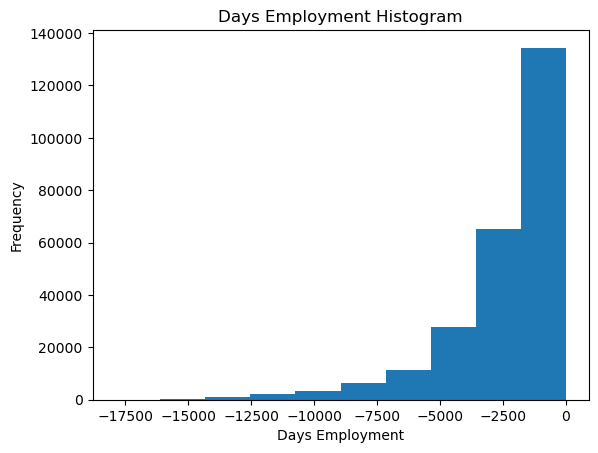

In [20]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED']==365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)
print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [22]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(25))
print('\nMost Negative Correlations:\n', correlations.head(25))

Most Positive Correlations:
 OCCUPATION_TYPE_Low-skill Laborers                   0.027591
FLAG_WORK_PHONE                                      0.028524
ORGANIZATION_TYPE_Self-employed                      0.029139
NAME_HOUSING_TYPE_With parents                       0.029966
OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                   

In [23]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982712)

In [24]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
corr = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', corr.tail(25))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 NAME_FAMILY_STATUS_Single / not married              0.026518
OCCUPATION_TYPE_Low-skill Laborers                   0.027591
FLAG_WORK_PHONE                                      0.028524
ORGANIZATION_TYPE_Self-employed                      0.029139
NAME_HOUSING_TYPE_With parents                       0.029966
OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary

In [25]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982712)

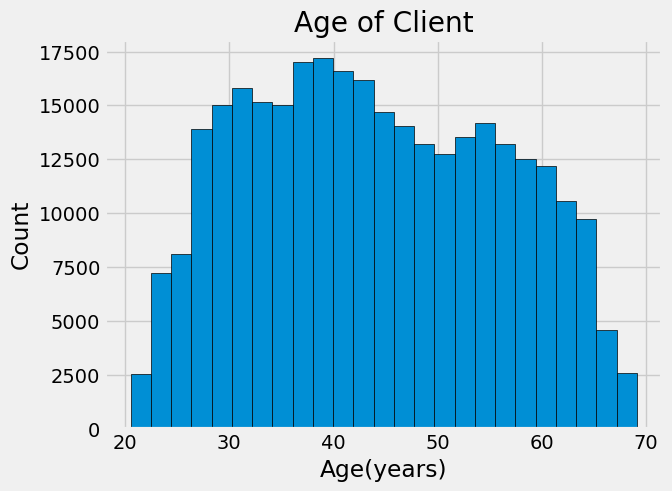

In [26]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH']/365,edgecolor='k',bins=25)
plt.title('Age of Client');
plt.xlabel('Age(years)');
plt.ylabel('Count');

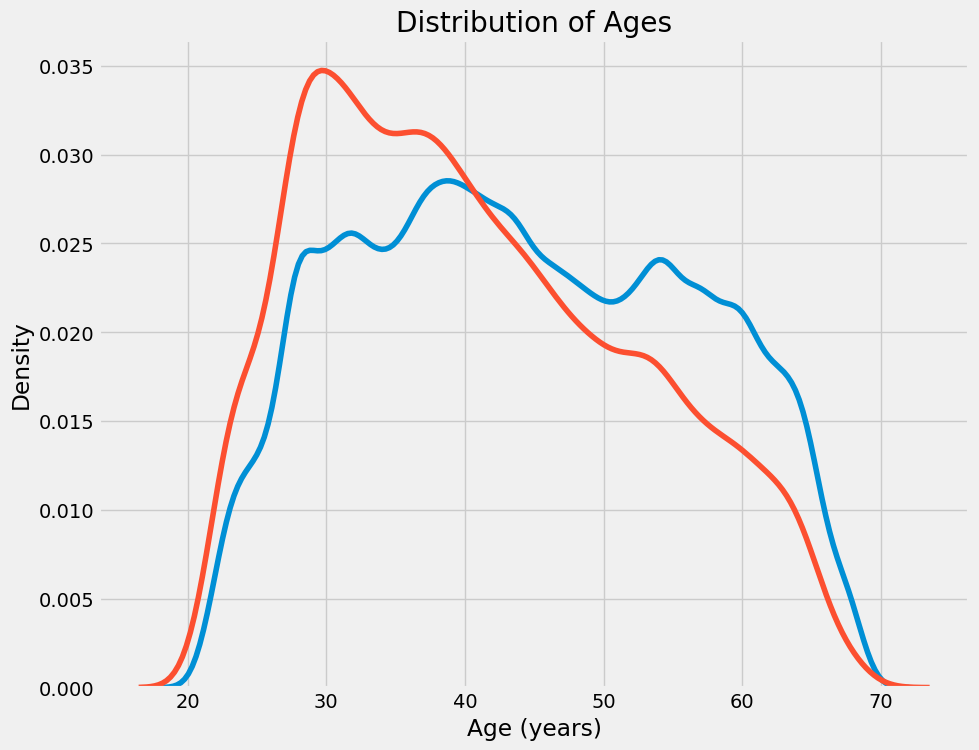

In [27]:
plt.figure(figsize = (10, 8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [28]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [29]:
age_data = app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

In [30]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [31]:
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
...,...,...,...,...
307506,0,9327,25.553425,"(25.0, 30.0]"
307507,0,20775,56.917808,"(55.0, 60.0]"
307508,0,14966,41.002740,"(40.0, 45.0]"
307509,1,11961,32.769863,"(30.0, 35.0]"


In [32]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


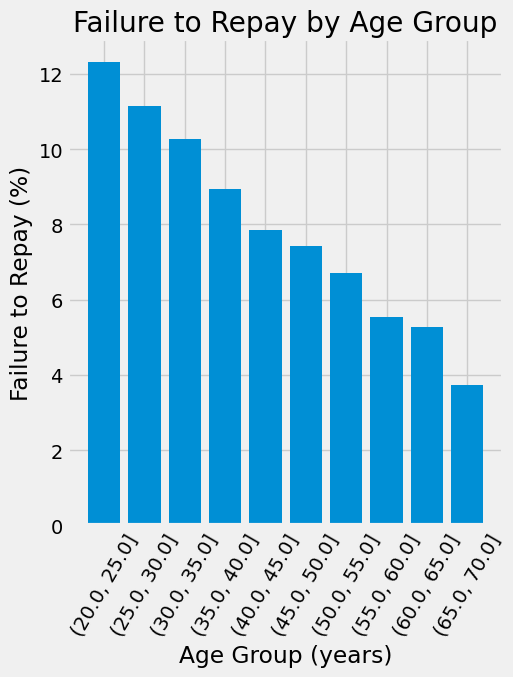

In [33]:
plt.figure(figsize=(5,6))
plt.bar(age_groups.index.astype(str),100*age_groups['TARGET'])
plt.xticks(rotation=60),plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [34]:
ext_data = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET','DAYS_BIRTH']]
ext_data_corr = ext_data.corr()
ext_data_corr

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,DAYS_BIRTH
EXT_SOURCE_1,1.000000,0.213982,0.186846,-0.155317,0.600610
EXT_SOURCE_2,0.213982,1.000000,0.109167,-0.160472,0.091996
EXT_SOURCE_3,0.186846,0.109167,1.000000,-0.178919,0.205478
TARGET,-0.155317,-0.160472,-0.178919,1.000000,-0.078239
DAYS_BIRTH,0.600610,0.091996,0.205478,-0.078239,1.000000


Text(0.5, 1.0, 'correlation heatmap')

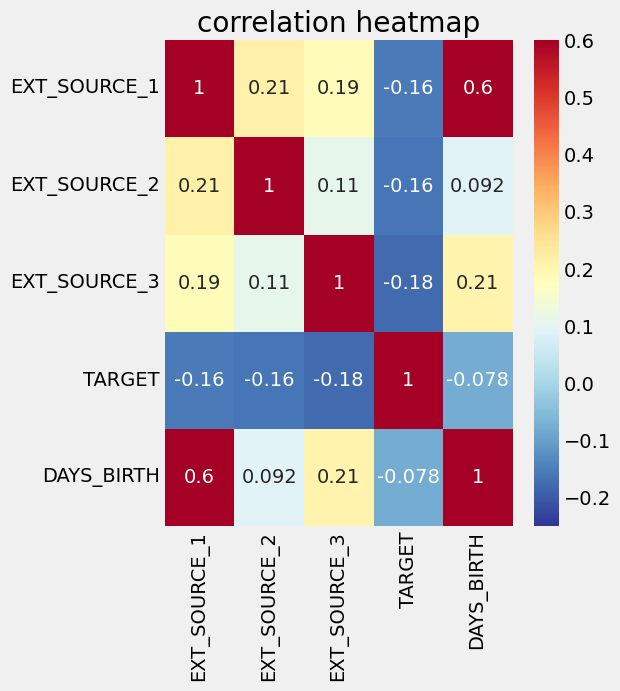

In [35]:
plt.figure(figsize=(5,6))
sns.heatmap(ext_data_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,annot=True,vmax=0.6)
plt.title("correlation heatmap")

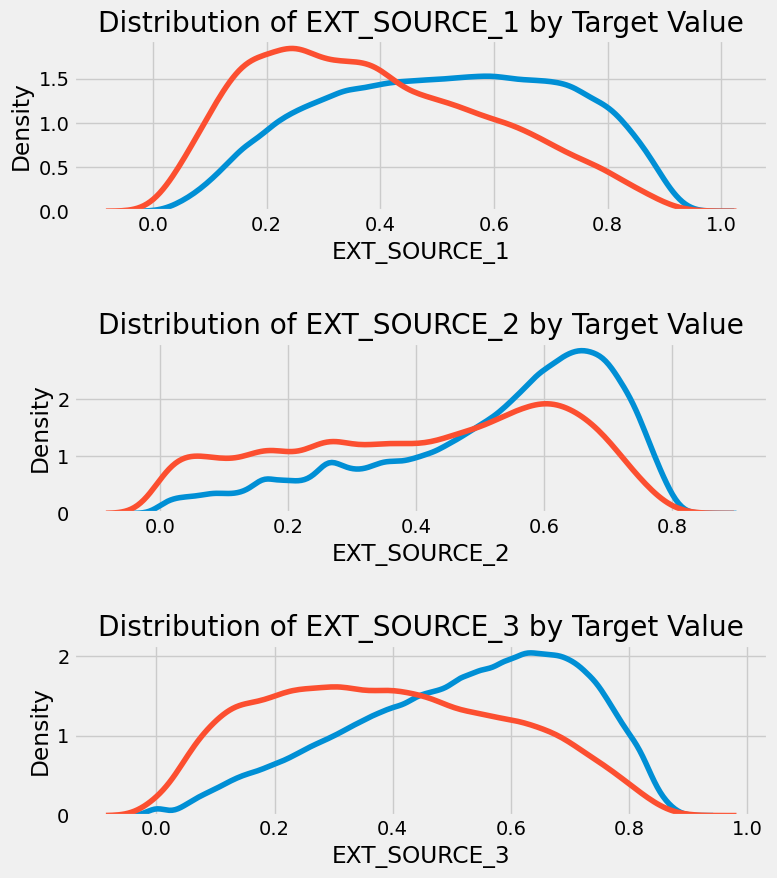

In [36]:
plt.figure(figsize=(8,9))
for i,source in enumerate (['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3,1,i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0') #blue
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1') # red
    plt.title('distribution of %s by target'%source)
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [37]:
# Good separation → curves peak at different x-values v b
# Poor separation → curves peak at similar x-values

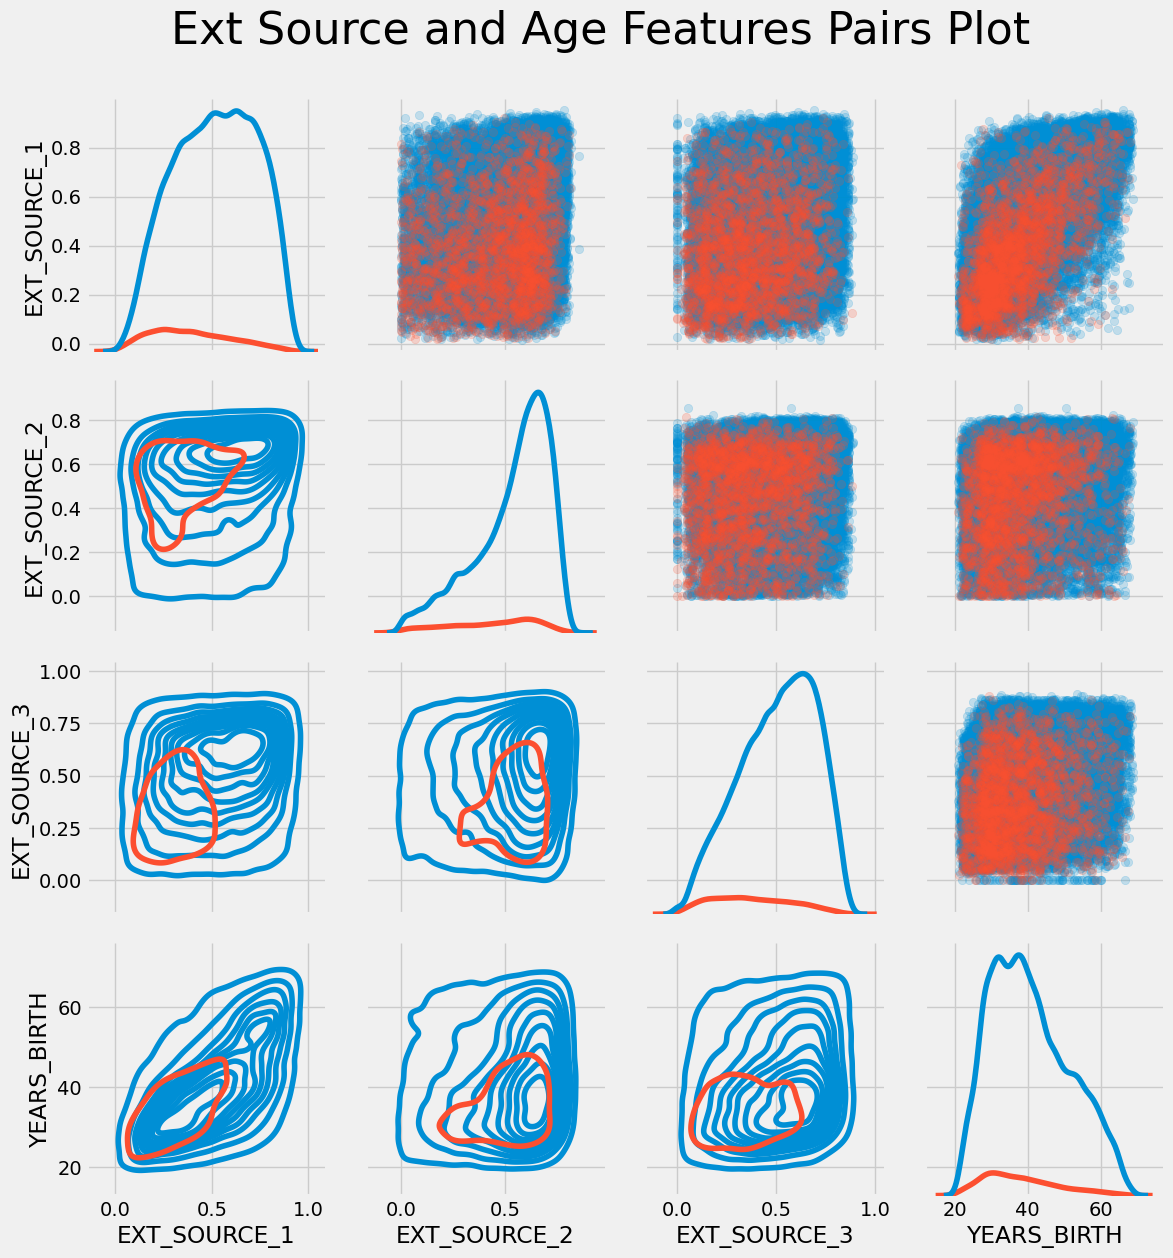

In [38]:
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
# Changed 'size' to 'height'
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a KDE plot (changed to match your map_diag call)
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [39]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [40]:
poly_features = poly_transformer.fit_transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial features shape:',poly_features.shape)

Polynomial features shape: (307511, 35)


In [41]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [42]:
poly_feature = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

In [43]:
poly_feature['TARGET'] = poly_target
poly_corrs = poly_feature.corr()['TARGET'].sort_values()
print(poly_corrs.head(15))
print(poly_corrs.tail(15))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
Name: TARGET, dtype: float64
EXT_SOURCE_1^2 EXT_SOURCE_3   -0.138846
EXT_SOURCE_2 DAYS_BIRTH^2     -0.132839
EXT_SOURCE_3^3                -0.128213
EXT_SOURCE_3 DAYS_BIRTH^2     -0.126950
EXT_SOURCE_1 DAYS_BIRTH       -0.104882
EXT_SO

In [44]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_feature['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_feature, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly,app_test_poly = app_train_poly.align(app_test_poly,join='inner',axis=1)
# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [45]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [46]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

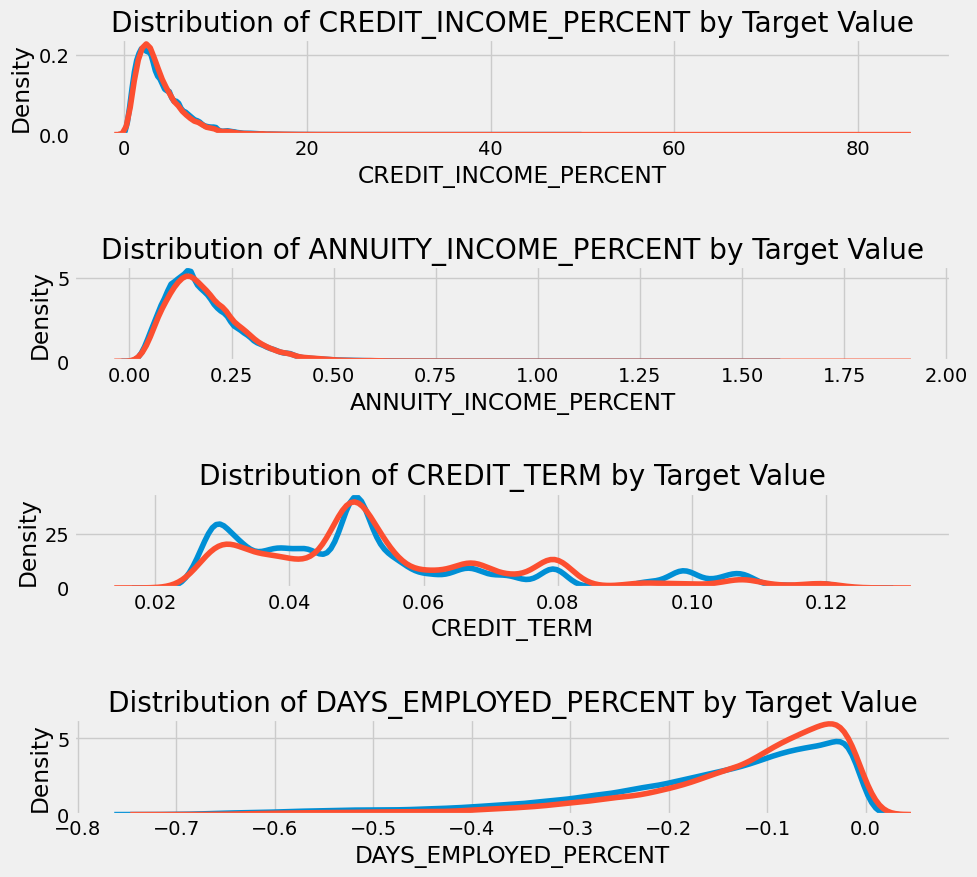

In [47]:
plt.figure(figsize=(10,9))
for index,cols in enumerate (['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,index+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, cols], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, cols], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % cols)
    plt.xlabel('%s' % cols); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
if 'TARGET' in app_train:
    train = app_train.drop(columns = 'TARGET')
else :
    train = app_train.copy()


features = list(train.columns)
test = app_test.copy()
imputer = SimpleImputer(strategy='median')
scaler = MinMaxScaler(feature_range=(0,1))
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)
scaler.fit(train)
scaler.transform(train)
scaler.transform(test)
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [49]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(C = 0.0001)
# log_reg.fit(train,train_labels)

In [50]:
# predicitons = log_reg.predict_proba(test)

In [51]:
# from sklearn.metrics import accuracy_score
# accuracy  = accuracy_score(test_labels,predictions)

In [52]:
#now lets do with random forest

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(train,train_labels,test_size=0.2,random_state=42)
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(x_train,y_train)
predictions = log_reg.predict(x_test)
accuracy = accuracy_score(predictions,y_test)


In [55]:
accuracy

0.9195161211648212

In [56]:
#by using random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,verbose=1,n_jobs=-1,random_state=50)
random_forest.fit(x_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   58.0s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [58]:
predictions_rf = random_forest.predict(x_test)
accuracy_rf = accuracy_score(predictions_rf,y_test)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


In [59]:
accuracy_rf

0.9195974180121295

In [60]:
print ("confusion matrix LR")
print(confusion_matrix(predictions, y_test))
print ("confusion matrix RF")
print(confusion_matrix(predictions_rf, y_test))

confusion matrix LR
[[56553  4949]
 [    1     0]]
confusion matrix RF
[[56550  4941]
 [    4     8]]


In [61]:
from sklearn.metrics import classification_report
print ("classification_report LR")
print(classification_report(predictions, y_test))
print ("classification_report RF")
print(classification_report(predictions_rf, y_test))

classification_report LR
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     61502
           1       0.00      0.00      0.00         1

    accuracy                           0.92     61503
   macro avg       0.50      0.46      0.48     61503
weighted avg       1.00      0.92      0.96     61503

classification_report RF
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     61491
           1       0.00      0.67      0.00        12

    accuracy                           0.92     61503
   macro avg       0.50      0.79      0.48     61503
weighted avg       1.00      0.92      0.96     61503



In [62]:
from sklearn.metrics import roc_auc_score
prob = log_reg.predict_proba(x_test)[:,1]
prob_rf = random_forest.predict_proba(x_test)[:,1]

auc = roc_auc_score(y_test,prob)

print("ROC AUC:",auc)

auc_rf = roc_auc_score(y_test,prob_rf)

print("ROC AUC:",auc_rf)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s


ROC AUC: 0.6322002443096906
ROC AUC: 0.70808850694383


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished


In [63]:
app_train_poly_label = app_train['TARGET']


In [64]:
poly_x_train,poly_x_test,poly_y_train,poly_y_test = train_test_split(app_train_poly,app_train_poly_label,random_state=42,test_size=0.2)

In [65]:
poly_features_names = list(app_train_poly.columns)
imputer = SimpleImputer(strategy = 'median')
poly_features = imputer.fit_transform(app_train_poly)

poly_features_test = imputer.transform(app_test_poly)
scaler = MinMaxScaler(feature_range=(0,1))
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)



In [68]:
random_forest_poly = RandomForestClassifier(n_estimators = 100,verbose = 1,n_jobs = -1,random_state = 50)
random_forest_poly.fit(poly_x_train,poly_y_train)
pred_rf_poly = random_forest_poly.predict_proba(poly_x_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


In [69]:
auc_rf_poly = roc_auc_score(y_test,pred_rf_poly)

print("ROC AUC:",auc_rf)

ROC AUC: 0.70808850694383
